## Rolling 30-day homicides calculation 

In [4]:
import pandas as pd

Read in the individual-level homicides data and group by date.

In [5]:
homicides = pd.read_csv('input/baltimore-homicide-victims_oct8_2018.csv')
homicides['date'] = pd.to_datetime(homicides['date_found'])
homicides['year'] = homicides['date'].dt.year
homicides = homicides[homicides['year'] >= 2007]

homicides_grouped = (homicides.groupby(['date'], 
                                       as_index=False)['date_found']
                     .count())
homicides_grouped.rename(columns={"date_found": "number_of_homicides"}, inplace = True)

homicides_grouped.head()

,date,number_of_homicides
0,2007-01-01,1
1,2007-01-02,2
2,2007-01-03,1
3,2007-01-05,3
4,2007-01-07,1


Fill in the missing dates with 0.

In [6]:
homicides_grouped.head(15)

,date,number_of_homicides
0,2007-01-01,1
1,2007-01-02,2
2,2007-01-03,1
3,2007-01-05,3
4,2007-01-07,1
5,2007-01-08,2
6,2007-01-09,5
7,2007-01-13,1
8,2007-01-15,1
9,2007-01-18,1


In [7]:
homicides_grouped.index = homicides_grouped['date']
filled = homicides_grouped.resample("1d").sum().fillna(0)

In [8]:
filled.head(15)

,number_of_homicides
date,
2007-01-01,1
2007-01-02,2
2007-01-03,1
2007-01-04,0
2007-01-05,3
2007-01-06,0
2007-01-07,1
2007-01-08,2
2007-01-09,5


Calculate the rolling 30-day sum of homicides.

In [9]:
rolling = filled.rolling('30D', min_periods = 1).sum().reset_index()

In [10]:
rolling.head(15)

,date,number_of_homicides
0,2007-01-01,1.0
1,2007-01-02,3.0
2,2007-01-03,4.0
3,2007-01-04,4.0
4,2007-01-05,7.0
5,2007-01-06,7.0
6,2007-01-07,8.0
7,2007-01-08,10.0
8,2007-01-09,15.0
9,2007-01-10,15.0


In [11]:
rolling.to_csv('output/rolling.csv', index = False)

Now use R to plot it.

In [13]:
%load_ext rpy2.ipython

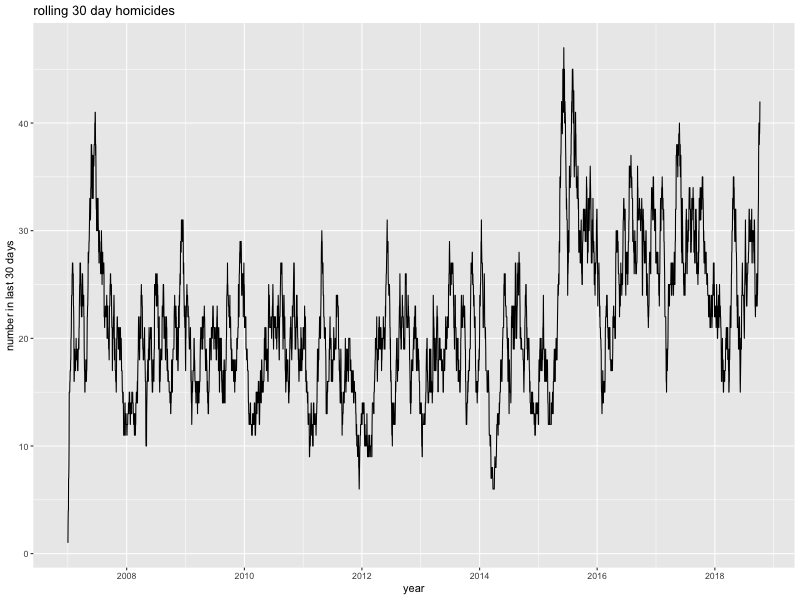

In [14]:
%%R -i rolling -w 800 -h 600 -u px
library('ggplot2')

ggplot(rolling, aes(x = date, y = number_of_homicides)) + geom_line() + labs(x = 'year', 
                                                           y = 'number in last 30 days', 
                                                           title = 'rolling 30 day homicides')